In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import os
import subprocess

import random as random
import scipy.stats as stats
import scipy as sci

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
mass_mol_FC = 129.09
mass_mol_CY = 111.01

def convert_to_uM(ug, mass_mol):
    
    mass = ug
    
    vol = 0.001
    
    uM = (((mass*10**-6)/(vol*mass_mol))*10**6)
    
    return uM

In [3]:
def get_derivative_growth_rate(well, df, tmax=25):
    # well : a tuple of the format (row, col)
    # source : DataFrame where well was measured
    # tmax : defines the interval in which the function will measure the growth rate, from t=0 to t=tmax
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    # define time range
    
    df_data = df.loc[df_cols]
    # select the subset of the DataFrame in the selected timerange
    data = df_data[(well[0]+str(well[1]))]
    # 

    data_diff = data.diff()*4
    
    get_top_5 = data_diff.nlargest(5)
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    
    return growth_rate, std_err

In [4]:
def format_table(imported_df):
    
    rename_dict = {}


    for col_name in imported_df.columns:
        to_hours = np.float64(col_name.strip('s'))/(60*60)
        rename_dict[col_name] = to_hours
    
    imported_df.rename(columns = rename_dict, inplace=True)

In [5]:
def get_AUC(well, df, t_end = 50):
    
    df_indexes = [ x for x in list(df.index) if x<=t_end]
    
    #print(well)
    
    df_data = df.loc[df_indexes]
    data = df_data[well]
       
    x_vals = list(data.index)
    y_vals = [data.loc[x] for x in list(data.index)]
    
    auc = np.trapz(y_vals, x=x_vals)
    
    return auc

In [6]:
od_readings_df = pd.read_excel('./misc_data/haplo_test.xlsx', skiprows=[0,2]+[x for x in range(99,133)], index_col=0)
format_table(od_readings_df)

od_readings_df

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.506111,45.756111,46.006111,46.256111,46.506111,46.756111,47.006111,47.256111,47.506111,47.756389
A1,0.095100,0.099550,0.099025,0.100050,0.100200,0.101900,0.10208,0.10270,0.10300,0.10325,...,0.14322,0.14355,0.14388,0.14413,0.14363,0.14403,0.14413,0.14448,0.14418,0.14468
A2,0.096125,0.099600,0.099275,0.099350,0.099400,0.099775,0.10037,0.10103,0.10175,0.10268,...,0.18730,0.18780,0.18808,0.18838,0.18845,0.18900,0.18950,0.18995,0.18990,0.19045
A3,0.097350,0.099700,0.099850,0.099400,0.099775,0.100100,0.10090,0.10170,0.10243,0.10340,...,0.27573,0.27648,0.27738,0.27847,0.27930,0.28040,0.28113,0.28237,0.28280,0.28392
A4,0.096750,0.098875,0.099600,0.099600,0.100200,0.100650,0.10127,0.10220,0.10313,0.10425,...,0.41720,0.41975,0.42225,0.42440,0.42705,0.42940,0.43210,0.43435,0.43680,0.43928
A5,0.096675,0.099025,0.098975,0.099075,0.099675,0.099875,0.10050,0.10150,0.10245,0.10375,...,0.79770,0.79878,0.79965,0.80032,0.80110,0.80232,0.80317,0.80362,0.80468,0.80502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.099775,0.102100,0.102500,0.102850,0.103480,0.104250,0.10533,0.10673,0.10863,0.11078,...,0.92433,0.92552,0.92630,0.92630,0.92613,0.92648,0.92675,0.92780,0.92820,0.92868
H9,0.100680,0.103150,0.103530,0.103830,0.104430,0.105330,0.10618,0.10760,0.10970,0.11200,...,0.97683,0.97823,0.97893,0.97900,0.97908,0.97928,0.97965,0.98075,0.98110,0.98182
H10,0.099600,0.102330,0.102550,0.102800,0.103680,0.104280,0.10548,0.10695,0.10865,0.11130,...,1.00130,1.00210,1.00270,1.00260,1.00230,1.00240,1.00270,1.00360,1.00370,1.00430
H11,0.099450,0.101630,0.101950,0.102300,0.102830,0.103680,0.10473,0.10623,0.10793,0.11040,...,1.00920,1.00970,1.01000,1.00990,1.00940,1.00920,1.00990,1.01030,1.01030,1.01060


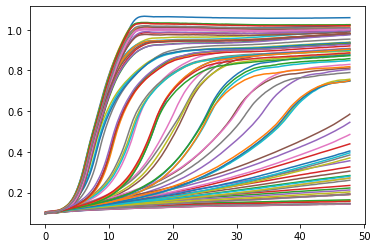

In [7]:
for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    for col in range(1, 12):
        plt.plot(od_readings_df.T[row+str(col)])

In [9]:
conc_dict = {'1':0,
             '2':4, 
             '3':6,
             '4':7,
             '5':8,
             '6':9,
             '7':10,
             '8':12,
             '9':16,
             '10':20,
             '11':24,
             '12':30}

In [10]:
rep_dict={'A':1,
          'B':2,
          'C':3,
          'D':4,
          'E':1,
          'F':2,
          'G':3,
          'H':4}

In [11]:
dict_of_dicts = {}

index=0
for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    for col in [str(x) for x in range(1,13)]:
        data_dict={}


        if row in ['A', 'B', 'C', 'D']:
            data_dict['type'] = 'homozygous'
        else:
            data_dict['type'] = 'heterozygous'


        if row in ['A', 'B', 'C', 'D']:
            data_dict['genotype'] = 'wt/wt'
        elif row in ['E', 'F']:
            data_dict['genotype'] = 'wt/delta'
        elif row in ['G', 'H']:
            data_dict['genotype'] = 'delta/wt'

        data_dict['rep'] = rep_dict[row]

        data_dict['conc'] = conc_dict[col]
        
        data_dict['growth_rate_24'] = get_derivative_growth_rate((row, int(col)), od_readings_df.T, tmax=24)[0]


        dict_of_dicts[index] = data_dict

        index+=1

growth_curves_df = pd.DataFrame.from_dict(dict_of_dicts, orient='index')
growth_curves_df

,type,genotype,rep,conc,growth_rate_24,growth_rate_48,auc_24,auc_48
0,homozygous,wt/wt,1,0,0.00536,0.00536,1.516433,2.636694
1,homozygous,wt/wt,1,4,0.00392,0.00392,1.617472,2.854118
2,homozygous,wt/wt,1,6,0.00528,0.00548,1.754792,3.173708
3,homozygous,wt/wt,1,7,0.00740,0.01072,1.886798,3.527929
4,homozygous,wt/wt,1,8,0.01800,0.04380,2.074847,4.242981
...,...,...,...,...,...,...,...,...
91,heterozygous,delta/wt,4,12,0.10952,0.10952,3.611814,5.089115
92,heterozygous,delta/wt,4,16,0.12304,0.12304,3.937019,5.261040
93,heterozygous,delta/wt,4,20,0.12632,0.12632,4.018851,5.326580
94,heterozygous,delta/wt,4,24,0.12740,0.12740,4.036460,5.345259


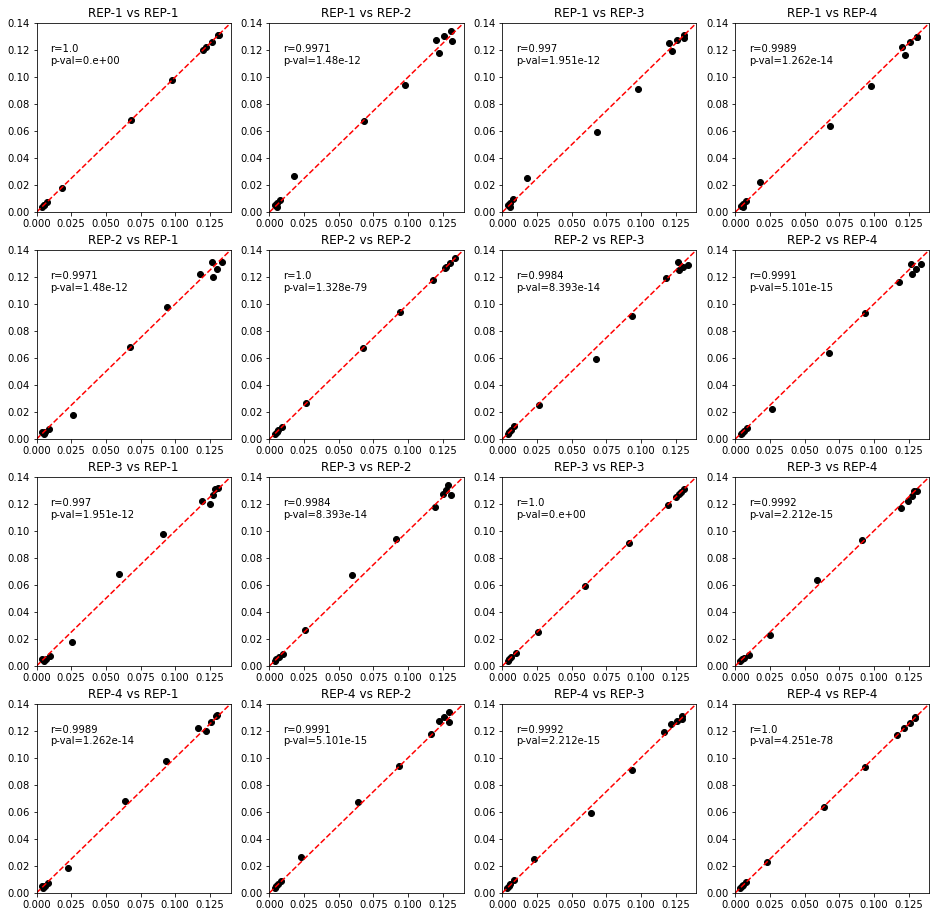

In [14]:
homozygous_strains = growth_curves_df[growth_curves_df['type']=='homozygous']


fig, axs = plt.subplots(4, 4, figsize=(16,16))

for x in [1,2,3,4]:
    for y in [1,2,3,4]:
        
        x_data = homozygous_strains[homozygous_strains['rep']==x]['growth_rate_24']
        y_data = homozygous_strains[homozygous_strains['rep']==y]['growth_rate_24']
        
        r, pval = stats.pearsonr(x_data, y_data)
        
        axs[x-1,y-1].scatter(x_data, y_data, color='k')
        axs[x-1,y-1].plot([0,0.14], [0,0.14], linestyle='--', color='r')
        axs[x-1,y-1].text(0.01,0.11, 'r='+str(np.round(r,4))+'\np-val='+str(np.format_float_scientific(pval,3)))
        axs[x-1,y-1].set_title('REP-'+str(x)+' vs '+'REP-'+str(y))
        axs[x-1,y-1].set_xlim(0,0.14)
        axs[x-1,y-1].set_ylim(0,0.14)
        

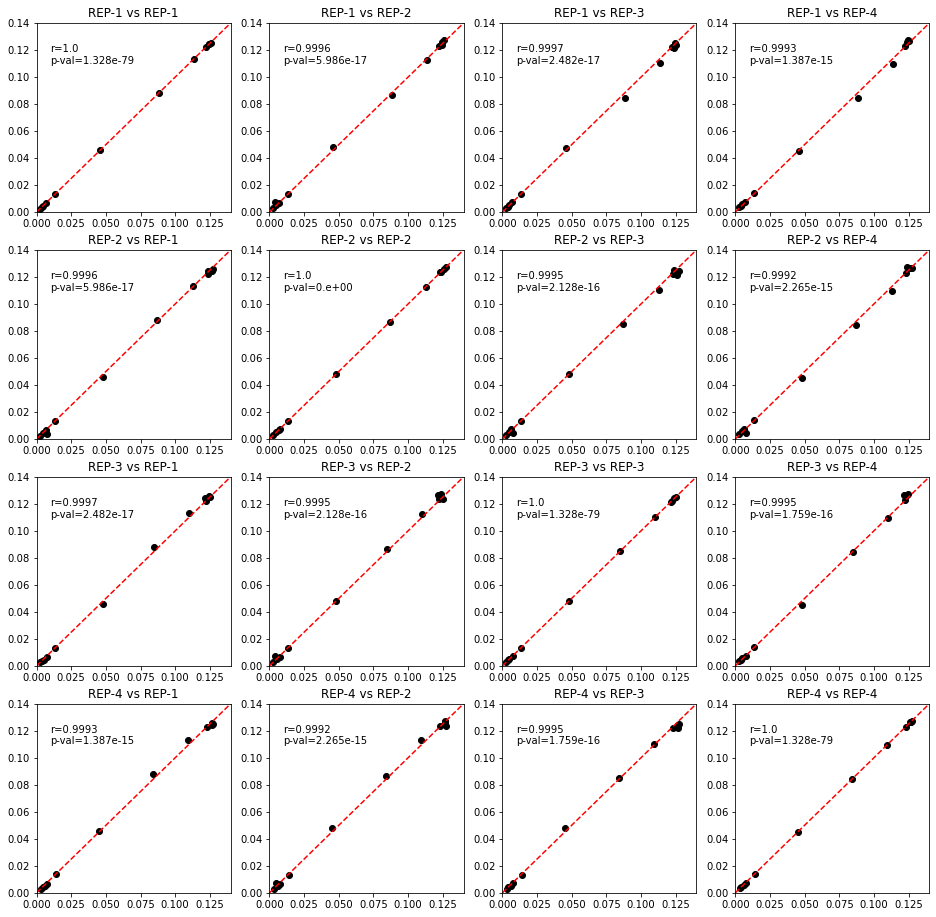

In [15]:
heterozygous_strains = growth_curves_df[growth_curves_df['type']=='heterozygous']


fig, axs = plt.subplots(4, 4, figsize=(16,16))

for x in [1,2,3,4]:
    for y in [1,2,3,4]:
        
        x_data = heterozygous_strains[heterozygous_strains['rep']==x]['growth_rate_24']
        y_data = heterozygous_strains[heterozygous_strains['rep']==y]['growth_rate_24']
        
        r, pval = stats.pearsonr(x_data, y_data)
        
        axs[x-1,y-1].scatter(x_data, y_data, color='k')
        axs[x-1,y-1].plot([0,0.14], [0,0.14], linestyle='--', color='r')
        axs[x-1,y-1].text(0.01,0.11, 'r='+str(np.round(r,4))+'\np-val='+str(np.format_float_scientific(pval,3)))
        axs[x-1,y-1].set_title('REP-'+str(x)+' vs '+'REP-'+str(y))
        axs[x-1,y-1].set_xlim(0,0.14)
        axs[x-1,y-1].set_ylim(0,0.14)

Text(0, 0.5, 'Max. growth rate (OD/h)')

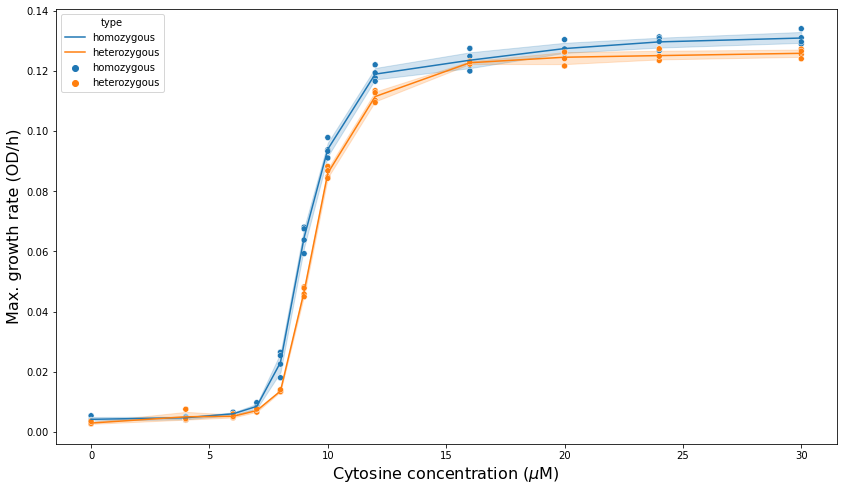

In [19]:
plt.figure(figsize=(14,8))

sns.lineplot(data=growth_curves_df, x='conc', y='growth_rate_24', hue='type')

sns.scatterplot(data=growth_curves_df, x='conc', y='growth_rate_24', hue='type')

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=16)
plt.ylabel('Max. growth rate (OD/h)', fontsize=16)

In [20]:
max_growth_rate = np.mean(homozygous_strains[homozygous_strains['conc']==30]['growth_rate_24'])
min_growth_rate = np.mean(growth_curves_df[growth_curves_df['conc']==0]['growth_rate_24'])

min_growth_rate, max_growth_rate

(0.0035450000000000134, 0.13096999999999998)

In [21]:
growth_curves_df['norm_growth_rate_24'] = (growth_curves_df['growth_rate_24'])/(max_growth_rate)
growth_curves_df

,type,genotype,rep,conc,growth_rate_24,growth_rate_48,auc_24,auc_48,norm_growth_rate_24
0,homozygous,wt/wt,1,0,0.00536,0.00536,1.516433,2.636694,0.040925
1,homozygous,wt/wt,1,4,0.00392,0.00392,1.617472,2.854118,0.029931
2,homozygous,wt/wt,1,6,0.00528,0.00548,1.754792,3.173708,0.040315
3,homozygous,wt/wt,1,7,0.00740,0.01072,1.886798,3.527929,0.056501
4,homozygous,wt/wt,1,8,0.01800,0.04380,2.074847,4.242981,0.137436
...,...,...,...,...,...,...,...,...,...
91,heterozygous,delta/wt,4,12,0.10952,0.10952,3.611814,5.089115,0.836222
92,heterozygous,delta/wt,4,16,0.12304,0.12304,3.937019,5.261040,0.939452
93,heterozygous,delta/wt,4,20,0.12632,0.12632,4.018851,5.326580,0.964496
94,heterozygous,delta/wt,4,24,0.12740,0.12740,4.036460,5.345259,0.972742


In [22]:
homozygous_strains = growth_curves_df[(growth_curves_df['type']=='homozygous')&(growth_curves_df['conc']!=0)]

homozygous_x_val = list(homozygous_strains['conc'])
homozygous_y_val = list(homozygous_strains['norm_growth_rate_24'])



heterozygous_strains = growth_curves_df[(growth_curves_df['type']=='heterozygous')&(growth_curves_df['conc']!=0)]

heterozygous_x_val = list(heterozygous_strains['conc'])
heterozygous_y_val = list(heterozygous_strains['norm_growth_rate_24'])

In [23]:
homozygous_y_val

[0.029930518439337098,
 0.04031457585706656,
 0.0565014888905862,
 0.1374360540581814,
 0.5198136977933889,
 0.7473467206230433,
 0.9321218599679315,
 0.916240360387876,
 0.9635794456745829,
 1.002977781171262,
 1.000839886997023,
 0.038787508589753605,
 0.048866152554019715,
 0.06642742612812085,
 0.20218370619225826,
 0.5155379094449113,
 0.7161945483698566,
 0.8994426204474318,
 0.9736580896388477,
 0.9959532717416195,
 0.9681606474765218,
 1.0237458960067192,
 0.03817668168282817,
 0.04978239291440766,
 0.07421546919141753,
 0.19363212949530467,
 0.4526227380316087,
 0.6954264335343977,
 0.9116591585859355,
 0.9538062151637775,
 0.9724364358249994,
 0.9987019928227843,
 0.984958387416966,
 0.036344200962052285,
 0.044284950752080846,
 0.06169351759945093,
 0.17194777429945696,
 0.4871344582728842,
 0.7125295869283048,
 0.8902802168435524,
 0.9309002061540798,
 0.9611361380468811,
 0.9910666564862177,
 0.9904558295792919]

In [24]:
def hill_equation(x, E, n):
    
    return 1/(1+((E/x)**n))

In [25]:
popt_hom, pcov_hom = sci.optimize.curve_fit(hill_equation, homozygous_x_val, homozygous_y_val)

popt_hom, pcov_hom


(array([9.12312533, 9.97719786]),
 array([[ 0.0017087 , -0.00119466],
        [-0.00119466,  0.2021762 ]]))

In [26]:
popt_hom[0]

9.12312533143328

In [27]:
dof = np.size(heterozygous_x_val) - 2 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)


ci_ic50_hom = tval*np.sqrt(pcov_hom[0][0])
ci_n_hom = tval*np.sqrt(pcov_hom[1][1])
ci_ic50_hom, ci_n_hom

(0.08342020569783319, 0.9074104162605626)

In [28]:
popt_het, pcov_het = sci.optimize.curve_fit(hill_equation, heterozygous_x_val, heterozygous_y_val)

popt_het, pcov_het

(array([9.54592171, 9.87213738]),
 array([[ 0.00328464, -0.00546441],
        [-0.00546441,  0.33839659]]))

In [29]:
ci_ic50_het = tval*np.sqrt(pcov_het[0][0])
ci_n_het = tval*np.sqrt(pcov_het[1][1])
ci_ic50_het, ci_n_het

(0.11565993866106158, 1.1739557592153398)

In [30]:
from sklearn.metrics import r2_score


In [31]:
y_pred = hill_equation(homozygous_x_val, *popt_hom)
r2_hom = r2_score(homozygous_y_val, y_pred)

In [32]:
y_pred = hill_equation(heterozygous_x_val, *popt_het)
r2_het = r2_score(heterozygous_y_val, y_pred)

In [33]:
r2_hom, r2_het

(0.9933242013622204, 0.9889679667599004)

Text(17.5, 0.42, 'Heterozygous n = 9.872+-1.174')

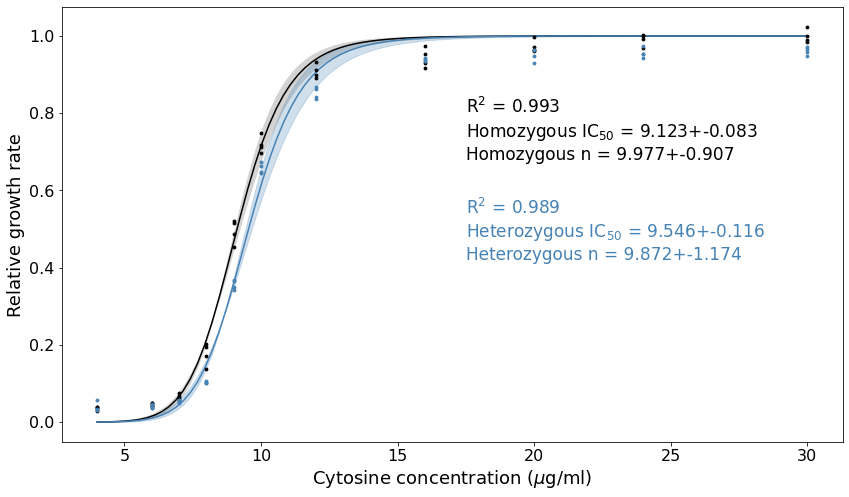

In [34]:
plt.figure(figsize=(14,8), facecolor='white')

plt.scatter(homozygous_strains['conc'], homozygous_strains['norm_growth_rate_24'], color='k', s=8, zorder=9)
#plt.axvline(9.18462531, linestyle='--', color='k')
#plt.axhline(0.5, linestyle='--', color='k')

plt.plot(np.linspace(4,30,100), [hill_equation(x,popt_hom[0], popt_hom[1]) for x in np.linspace(4,30,100)], 'k')
plt.fill_between(np.linspace(4,30,100), [hill_equation(x, popt_hom[0] + ci_ic50_hom, popt_hom[1] - ci_n_hom) for x in np.linspace(4,30,100)],
                 [hill_equation(x, popt_hom[0]-ci_ic50_hom, popt_hom[1]+ci_n_hom) for x in np.linspace(4,30,100)], color='lightgrey')



plt.scatter(heterozygous_strains['conc'], heterozygous_strains['norm_growth_rate_24'], color='steelblue', s=8, zorder=9)
#plt.axvline(9.60268632, linestyle='--', color='grey')
plt.plot(np.linspace(4,30,100), [hill_equation(x,popt_het[0],  popt_het[1]) for x in np.linspace(4,30,100)], 'steelblue')
plt.fill_between(np.linspace(4,30,100), [hill_equation(x, popt_het[0] + ci_ic50_het, popt_het[1] - ci_n_het) for x in np.linspace(4,30,100)],
                 [hill_equation(x, popt_het[0]-ci_ic50_het, popt_het[1]+ci_n_het) for x in np.linspace(4,30,100)], color='steelblue', alpha=0.25)


plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=18)
plt.ylabel('Relative growth rate', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.text(17.5, 0.8, ('R$^{2}$ = '+str(np.round(r2_hom,3))), fontsize=17)
plt.text(17.5, 0.74, ('Homozygous IC$_{50}$ = '+str(np.round(popt_hom[0],3))+'+-'+str(np.round(ci_ic50_hom,3))), fontsize=17)
plt.text(17.5, 0.68, ('Homozygous n = '+str(np.round(popt_hom[1],3))+'+-'+str(np.round(ci_n_hom,3))), fontsize=17)

plt.text(17.5, 0.54, ('R$^{2}$ = '+str(np.round(r2_het,3))), fontsize=17, color='steelblue')
plt.text(17.5, 0.48, ('Heterozygous IC$_{50}$ = '+str(np.round(popt_het[0],3))+'+-'+str(np.round(ci_ic50_het,3))), fontsize=17, color='steelblue')
plt.text(17.5, 0.42, ('Heterozygous n = '+str(np.round(popt_het[1],3))+'+-'+str(np.round(ci_n_het,3))), fontsize=17, color='steelblue')

(0.0, 1.01)

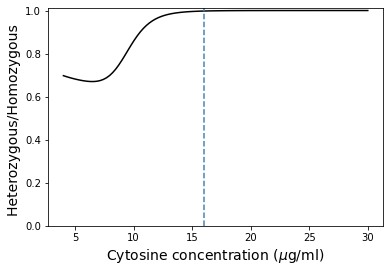

In [44]:
plt.plot(np.linspace(4,30,100), [(hill_equation(x,popt_het[0], popt_het[1]))/(hill_equation(x,popt_hom[0], popt_hom[1])) for x in np.linspace(4,30,100)], color='k')


plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=14)
plt.ylabel('Heterozygous/Homozygous', fontsize=14)
plt.axvline(16, linestyle='--', color='steelblue')
plt.ylim(0,1.01)

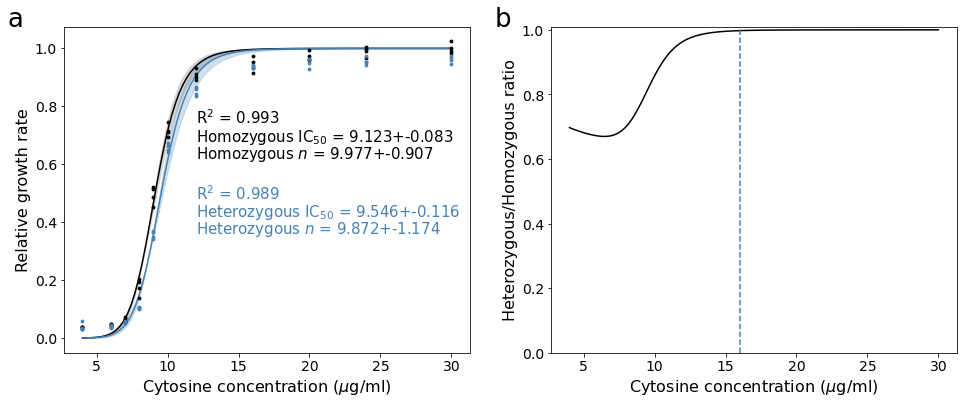

In [70]:
plt.figure(figsize = (16,6), facecolor='white')
ax1 = plt.subplot(121)

plt.scatter(homozygous_strains['conc'], homozygous_strains['norm_growth_rate_24'], color='k', s=8, zorder=9)
#plt.axvline(9.18462531, linestyle='--', color='k')
#plt.axhline(0.5, linestyle='--', color='k')

plt.plot(np.linspace(4,30,100), [hill_equation(x,popt_hom[0], popt_hom[1]) for x in np.linspace(4,30,100)], 'k')
plt.fill_between(np.linspace(4,30,100), [hill_equation(x, popt_hom[0] + ci_ic50_hom, popt_hom[1] - ci_n_hom) for x in np.linspace(4,30,100)],
                 [hill_equation(x, popt_hom[0]-ci_ic50_hom, popt_hom[1]+ci_n_hom) for x in np.linspace(4,30,100)], color='lightgrey')



plt.scatter(heterozygous_strains['conc'], heterozygous_strains['norm_growth_rate_24'], color='steelblue', s=8, zorder=9)
#plt.axvline(9.60268632, linestyle='--', color='grey')
plt.plot(np.linspace(4,30,100), [hill_equation(x,popt_het[0],  popt_het[1]) for x in np.linspace(4,30,100)], 'steelblue')
plt.fill_between(np.linspace(4,30,100), [hill_equation(x, popt_het[0] + ci_ic50_het, popt_het[1] - ci_n_het) for x in np.linspace(4,30,100)],
                 [hill_equation(x, popt_het[0]-ci_ic50_het, popt_het[1]+ci_n_het) for x in np.linspace(4,30,100)], color='steelblue', alpha=0.25)


plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=16)
plt.ylabel('Relative growth rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.text(12, 0.74, ('R$^{2}$ = '+str(np.round(r2_hom,3))), fontsize=15)
plt.text(12, 0.68, ('Homozygous IC$_{50}$ = '+str(np.round(popt_hom[0],3))+'+-'+str(np.round(ci_ic50_hom,3))), fontsize=15)
plt.text(12, 0.62, ('Homozygous $\it{n}$ = '+str(np.round(popt_hom[1],3))+'+-'+str(np.round(ci_n_hom,3))), fontsize=15)

plt.text(12, 0.48, ('R$^{2}$ = '+str(np.round(r2_het,3))), fontsize=15, color='steelblue')
plt.text(12, 0.42, ('Heterozygous IC$_{50}$ = '+str(np.round(popt_het[0],3))+'+-'+str(np.round(ci_ic50_het,3))), fontsize=15, color='steelblue')
plt.text(12, 0.36, ('Heterozygous $\it{n}$ = '+str(np.round(popt_het[1],3))+'+-'+str(np.round(ci_n_het,3))), fontsize=15, color='steelblue')


ax2 = plt.subplot(122)

plt.plot(np.linspace(4,30,100), [((hill_equation(x,popt_het[0], popt_het[1]))/(hill_equation(x,popt_hom[0], popt_hom[1]))) for x in np.linspace(4,30,100)], color='k')




plt.xlabel('Cytosine concentration ($\mu$g/ml)', fontsize=16)
plt.ylabel('Heterozygous/Homozygous ratio', fontsize=16)
plt.axvline(16, linestyle='--', color='steelblue')
plt.ylim(0,1.01)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.text(-0.14,1.0, 'a', fontsize=26, transform = ax1.transAxes)
plt.text(-0.14,1.0, 'b', fontsize=26, transform = ax2.transAxes)

plt.savefig('./figures/haploinsufficency_assay.svg', format='svg', dpi=600)